**Car Detection with Haar Cascade Classifier**

In [142]:
import urllib.request
import cv2
print(cv2.__version__)
from matplotlib import pyplot as plt


3.4.9


Function for displaying the image

In [143]:
def plt_show(image, title="", gray = False, size = (12,10)):
    from pylab import rcParams
    temp = image 
    
    #convert to grayscale images
    if gray==False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    
    #change image size
    rcParams['figure.figsize'] = [6,5]
    plt.axis("off")
    plt.title(title)
    plt.imshow(temp, cmap='gray')
    plt.show()

Function to detect the car

In [144]:
def detect_obj(image):
    plt_show(image)
    #Detecting the object
    object_list = detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=4, minSize=(40, 40))
    print(object_list)
    #Rectange for the object
    for obj in object_list:
        (x,y,w,h) = obj
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)#2 is line thickness
    plt_show(image)
    

**Load Image**

Load pre-trained classifier from "andrewssobral" git repository, training takes a long time but prediction is fast.

In [145]:
## read the url
haarcascade_url = 'https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml'
haar_name = "cars.xml" #Saving it locally
urllib.request.urlretrieve(haarcascade_url, haar_name)

('cars.xml', <http.client.HTTPMessage at 0x7f5852b4cf50>)

Get the detector using the cv2.CascadeClassifier() module on the pretrained dataset

In [146]:
detector = cv2.CascadeClassifier(haar_name)

In [147]:
#Trying it on a sample image.
image_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/CV0101/Dataset/car-road-behind.jpg"
image_name = "car-road-behind.jpg"
urllib.request.urlretrieve(image_url, image_name)
image = cv2.imread(image_name)

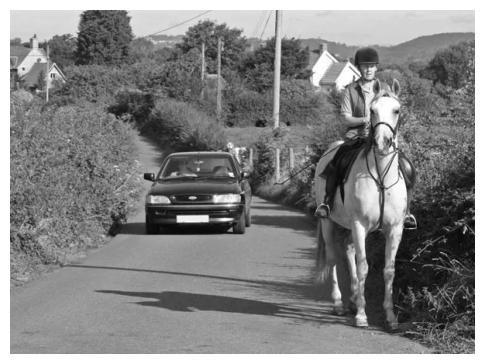

In [148]:
plt_show(image)

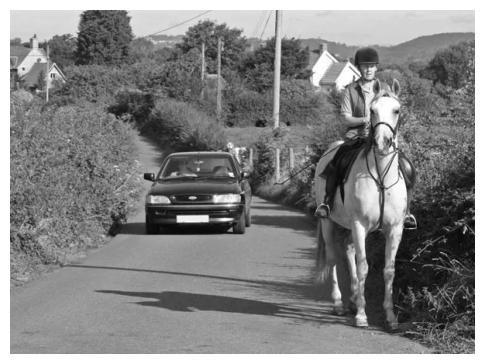

[[119 139 222 222]]


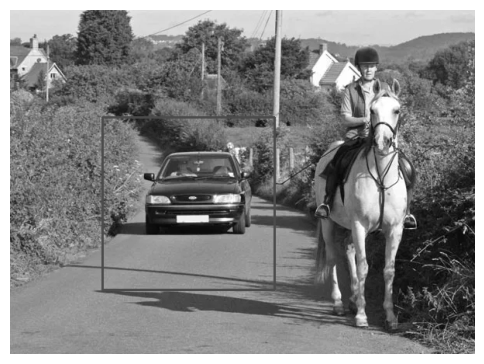

In [149]:
detect_obj(image)

In [150]:
image_name = "car.jpeg"
image = cv2.imread(image_name)

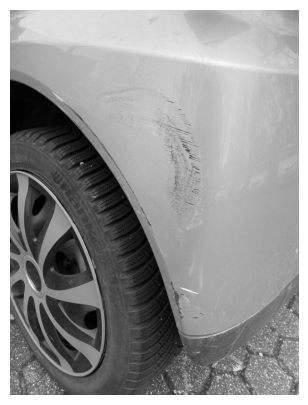

In [151]:
plt_show(image)

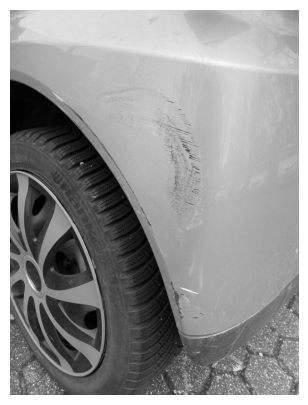

()


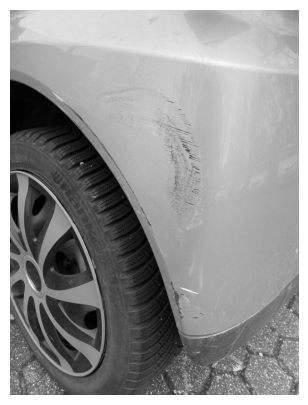

In [152]:
detect_obj(image)

In [153]:
image_name = "car2.jpg"
image = cv2.imread(image_name)

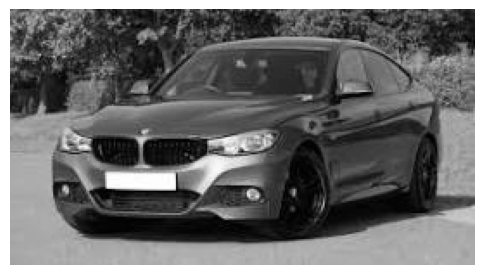

()


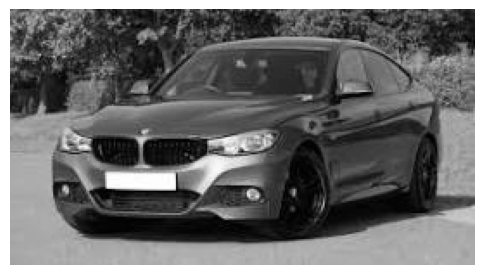

In [154]:
detect_obj(image)

In [155]:
my_image = cv2.imread("car4.jpg")

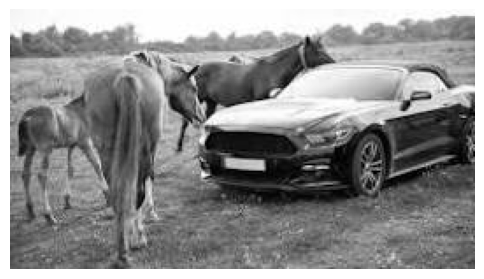

()


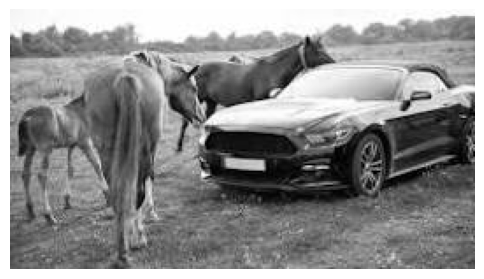

In [156]:
detect_obj(my_image)

In [157]:
image_name = "car-road-behind.jpg"
image = cv2.imread(image_name)

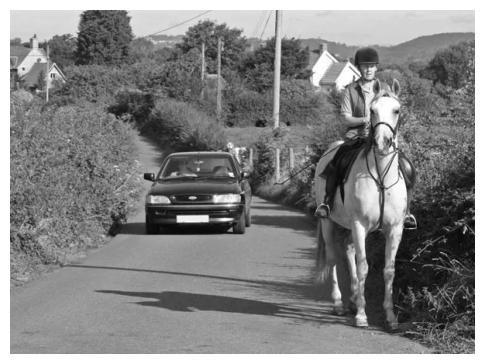

[[119 139 222 222]]


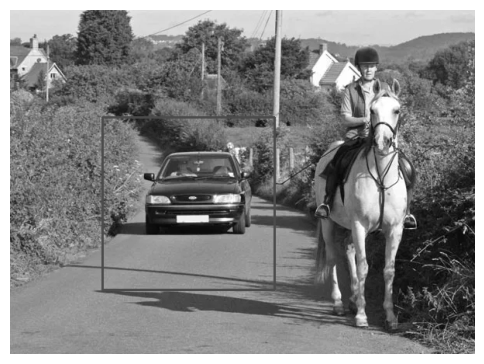

In [158]:
detect_obj(image)

In [159]:
if detector.empty():
    print("Error: Could not load Haar cascade file.")
    exit()
